In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Law of Large Numbers

In [5]:
n=10000

In [7]:
np.random.seed(51)
die_1=np.random.randint(1,7,size=n)

In [8]:
np.random.seed(81)
die_2=np.random.randint(1,7,size=n)

In [9]:
X=die_1+die_2
X

array([6, 8, 2, ..., 4, 7, 9])

In [10]:
df=pd.DataFrame({"die_1":die_1,"die_2":die_2,"X":X})
df.head(10)

,die_1,die_2,X
0,2,4,6
1,6,2,8
2,1,1,2
3,2,4,6
4,6,4,10
5,1,4,5
6,6,2,8
7,5,2,7
8,2,6,8
9,6,3,9


In [12]:
total_four=df[df.X==4]
len(total_four)

874

In [14]:
P=len(total_four)/len(df)
P

0.0874

In [15]:
freq=df.X.value_counts()
freq

7     1688
8     1394
6     1392
5     1147
9     1095
4      874
10     827
3      536
11     527
12     261
2      259
Name: X, dtype: int64

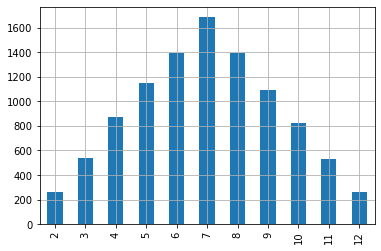

In [16]:
freq.sort_index().plot(kind="bar",grid=True);

In [17]:
prob=df.X.value_counts()/n
prob

7     0.1688
8     0.1394
6     0.1392
5     0.1147
9     0.1095
4     0.0874
10    0.0827
3     0.0536
11    0.0527
12    0.0261
2     0.0259
Name: X, dtype: float64

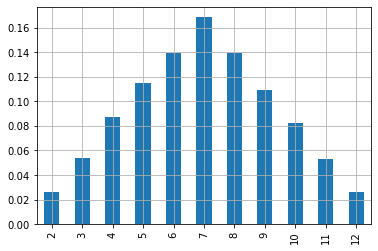

In [18]:
prob.sort_index().plot(kind="bar",grid=True);

# Binomial Distribution

# 
Exercise

The probability that a patient recovers from a stomach disease is 0.8.
Suppose 20 people are known to have contracted this disease.
What is the probability that

a. exactly 14 recover?

In [19]:
n=20
p=0.8
x=14

In [21]:
stats.binom.pmf(x,n,p) # probability mass function

0.10909970097304983

# 
b. at least 10 recover?

In [24]:
x=10

In [26]:
stats.binom.cdf(x-1,n,p) # cumulative distribution function (calculation was made until 9 that's why we used x-1)

0.0005634136976601897

# 
c. at least 14 but not moe than 18 recover?

In [27]:
x1=14
x2=18

In [30]:
stats.binom.cdf(x2,n,p)-stats.binom.cdf(x1-1,n,p)

0.844132196156189

# 
d. at most 16 recover?

In [31]:
x=16

In [32]:
stats.binom.cdf(x,n,p)

0.5885511380434305

# 
e. construct discrete probability distribution table and draw a graph

In [34]:
dist=[]

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))
    print(str(i)+"\t"+str(stats.binom.pmf(i,n,p)))

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


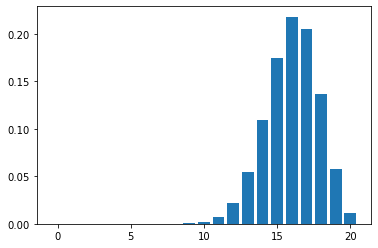

In [35]:
plt.bar(list(range(n+1)),dist)
plt.show;